In [1]:
import simulation
from propensities import loopModifyingPropensity, linearModifyingPropensity
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
parm = dict()
parm['K'] = 20
parm['kdecay'] = 0.006
parm['km1'] = parm['K']*parm['kdecay']
parm['alpha'] = 0
parm['knuc'] = 1

half = 10
N = 2*half + 1
#x0 = np.ones((1,N))
x0 = np.zeros((1,N))
parm['cen'] = half
x0[0,half] = 1

reactionMatrix = np.concatenate([np.eye(N),(-1)*np.eye(N)],axis=0)

assert reactionMatrix.shape == (2*N,N)
print(x0)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
#loopModifyingPropensity(x0,**parm)

In [ ]:
## loop steadystate
sim = simulation.Simulation()
sim.addInit(x0)
sim.addPropensity(propensity_func=loopModifyingPropensity,**parm)
sim.addReaction(reactionMatrix)
print(sim.getState())


sim.run(runType='steadystate',rep=10,tspan=[0,100],nproc=4)

print(sim.getState())


In [8]:
## linear steadystate
sim2 = simulation.Simulation()
sim2.addInit(x0)
sim2.addPropensity(propensity_func=linearModifyingPropensity,**parm)
sim2.addReaction(reactionMatrix)
print(sim2.getState())


sim2.run(runType='steadystate',rep=100,tspan=[0,2500],nproc=4)

print(sim2.getState())

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
fig = plt.figure(figsize=(13,13))
plt.imshow(sim2.getState(),cmap='Greys',vmin=0,vmax=1)
plt.axis('auto')
plt.colorbar()
plt.show()

NameError: name 'sim2' is not defined

<Figure size 936x936 with 0 Axes>

In [3]:
## linear timeevolution
sim3 = simulation.Simulation()
sim3.addInit(x0)
sim3.addPropensity(propensity_func=linearModifyingPropensity,**parm)
sim3.addReaction(reactionMatrix)
print(sim3.getState())


sim3.run(runType='timeevolution',rep=10,tspan=[0,10000],nproc=4)

print(sim3.getState())

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.3 0.3 0.3 ... 0.3 0.2 0.2]
 [0.2 0.2 0.2 ... 0.2 0.2 0.2]
 [0.2 0.2 0.1 ... 0.2 0.2 0.2]]


In [4]:
sim3.getState().shape

(10000, 21)

In [5]:
print(sim3.getState()[:,10])

[0.  1.1 0.2 ... 0.3 0.2 0.2]


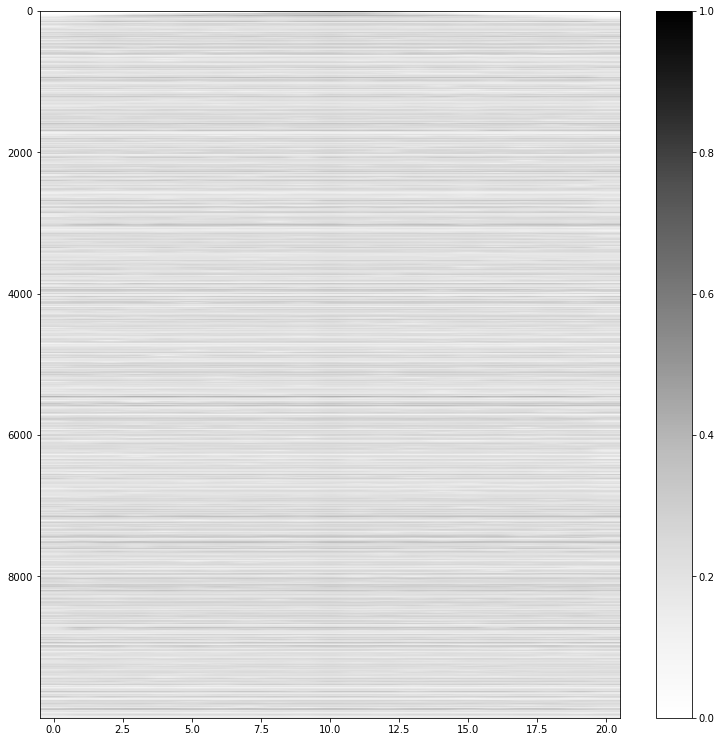

In [6]:
fig = plt.figure(figsize=(13,13))
plt.imshow(sim3.getState(),cmap='Greys',vmin=0,vmax=1)
plt.axis('auto')
plt.colorbar()
plt.show()